# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [3]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [4]:
print(f"The data has {df_data.shape[0]} rows and {df_data.shape[1]} columns.")

The data has 962 rows and 16 columns.


In [5]:
print('The column names are:')
for col in df_data:
    print(col)

The column names are:
year
category
prize
motivation
prize_share
laureate_type
full_name
birth_date
birth_city
birth_country
birth_country_current
sex
organization_name
organization_city
organization_country
ISO


In [6]:
print(f"The first Nobel prize was awarded in {df_data['year'].min()}.")

The first Nobel prize was awarded in 1901.


In [7]:
print(f"The latest year included in the dataset is {df_data.year.max()}.")

The latest year included in the dataset is 2020.


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [8]:
print(f"Any duplicates? {df_data.duplicated().any()}")

Any duplicates? False


### Check for NaN Values

In [9]:
print('The following columns have NaN values:')
df_data.isna().sum()

The following columns have NaN values:


year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [10]:
col_subset = ['year', 'category', 'laureate_type', 'birth_date', 'full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset][:5]

year category laureate_type birth_date  \
24   1904    Peace  Organization        NaN   
60   1910    Peace  Organization        NaN   
89   1917    Peace  Organization        NaN   
200  1938    Peace  Organization        NaN   
215  1944    Peace  Organization        NaN   

                                             full_name organization_name  
24   Institut de droit international (Institute of ...               NaN  
60   Bureau international permanent de la Paix (Per...               NaN  
89   Comité international de la Croix Rouge (Intern...               NaN  
200  Office international Nansen pour les Réfugiés ...               NaN  
215  Comité international de la Croix Rouge (Intern...               NaN

Organizations were listed under `full_name` column thus `organization_name` returns NaN values. Also, birth dates are not applicable for organizations.

In [11]:
col_subset = ['year', 'category', 'laureate_type', 'full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset].head()

year    category laureate_type                           full_name  \
1  1901  Literature    Individual                     Sully Prudhomme   
3  1901       Peace    Individual                      Frédéric Passy   
4  1901       Peace    Individual                   Jean Henry Dunant   
7  1902  Literature    Individual  Christian Matthias Theodor Mommsen   
9  1902       Peace    Individual                Charles Albert Gobat   

  organization_name  
1               NaN  
3               NaN  
4               NaN  
7               NaN  
9               NaN

Several individual awardees were not members of any organization thus `organization_name` column returns NaN values.

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [13]:
df_data['birth_date'] = pd.to_datetime(df_data.birth_date)
df_data.birth_date[:1]

0   1852-08-30
Name: birth_date, dtype: datetime64[ns]

#### Add a Column with the Prize Share as a Percentage

In [4]:
separated_values = df_data.prize_share.str.split("/", expand=True)
separated_values.head()

0  1
0  1  1
1  1  1
2  1  1
3  1  2
4  1  2

In [5]:
numerator = pd.to_numeric(separated_values[0])
denominator = pd.to_numeric(separated_values[1])

df_data['share_pct'] = numerator / denominator
df_data[['full_name', 'share_pct']].head()

full_name  share_pct
0  Jacobus Henricus van 't Hoff       1.00
1               Sully Prudhomme       1.00
2        Emil Adolf von Behring       1.00
3                Frédéric Passy       0.50
4             Jean Henry Dunant       0.50

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [7]:
df_sex = df_data.sex.value_counts()
pie = px.pie(values=df_sex.values, names=df_sex.index,
            title='Prize Distribution Based on Sex',
            hole=0.4)

pie.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did they win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [18]:
df_data.year.sort_values(ascending=True)
df_three_f = df_data[df_data.sex == 'Female'][:3]

In [19]:
print("The first 3 female Nobel laureates are:")
for name in df_three_f['full_name']:
    print(name)

The first 3 female Nobel laureates are:
Marie Curie, née Sklodowska
Baroness Bertha Sophie Felicita von Suttner, née Countess Kinsky von Chinic und Tettau
Selma Ottilia Lovisa Lagerlöf


In [20]:
print("They won the following prizes:")
df_three_f[['full_name', 'prize']]

They won the following prizes:


full_name  \
18                        Marie Curie, née Sklodowska   
29  Baroness Bertha Sophie Felicita von Suttner, n...   
51                      Selma Ottilia Lovisa Lagerlöf   

                                 prize  
18     The Nobel Prize in Physics 1903  
29          The Nobel Peace Prize 1905  
51  The Nobel Prize in Literature 1909

In [21]:
print("They were born in:")
df_three_f[['full_name', 'birth_country_current']]

They were born in:


full_name birth_country_current
18                        Marie Curie, née Sklodowska                Poland
29  Baroness Bertha Sophie Felicita von Suttner, n...        Czech Republic
51                      Selma Ottilia Lovisa Lagerlöf                Sweden

In [22]:
df_three_f[['full_name', 'organization_name']]

full_name organization_name
18                        Marie Curie, née Sklodowska               NaN
29  Baroness Bertha Sophie Felicita von Suttner, n...               NaN
51                      Selma Ottilia Lovisa Lagerlöf               NaN

All three were not part of an organization.

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [8]:
multiple_awardees = df_data[df_data['full_name'].duplicated()]
print(f"There are {multiple_awardees.full_name.nunique()} awardees who won a Nobel Prize more than once. They are:")
multiple_awardees = multiple_awardees.full_name.unique()
for awardee in multiple_awardees:
    print(awardee)

There are 6 awardees who won a Nobel Prize more than once. They are:
Marie Curie, née Sklodowska
Comité international de la Croix Rouge (International Committee of the Red Cross)
Linus Carl Pauling
John Bardeen
Frederick Sanger
Office of the United Nations High Commissioner for Refugees (UNHCR)


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [10]:
categories = df_data.category.value_counts()
bar = px.bar(x=categories.index, y=categories.values, title='No. of Prizes per Category', color=categories.values,
            labels={'x': 'Category', 'y':'No. of Prizes'}, color_continuous_scale='aggrnyl')
bar.update_coloraxes(showscale=False)
bar.show()

In [25]:
print(f"{categories.index[0]} has the most number of prizes awarded amounting to {categories.values[0]} prizes.")

Medicine has the most number of prizes awarded amounting to 222 prizes.


In [28]:
print(f"{categories.index[5]} has the fewest number of prizes awarded amounting to {categories.values[5]} prizes.")

Economics has the fewest number of prizes awarded amounting to 86 prizes.


**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [19]:
df_economics = df_data[df_data['category'] == 'Economics']
df_economics_first_awardee = df_economics[df_economics['year'] == df_economics.year.min()]
df_economics_first_awardee[['year', 'full_name', 'prize', 'prize_share']]

year      full_name                                              prize  \
393  1969  Jan Tinbergen  The Sveriges Riksbank Prize in Economic Scienc...   
394  1969  Ragnar Frisch  The Sveriges Riksbank Prize in Economic Scienc...   

    prize_share  
393         1/2  
394         1/2

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [23]:
df_by_category_and_sex = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize': 'count'})
df_by_category_and_sex.sort_values('prize', ascending=False, inplace=True)
df_by_category_and_sex

category     sex  prize
11     Physics    Male    212
7     Medicine    Male    210
1    Chemistry    Male    179
5   Literature    Male    101
9        Peace    Male     90
3    Economics    Male     84
8        Peace  Female     17
4   Literature  Female     16
6     Medicine  Female     12
0    Chemistry  Female      7
10     Physics  Female      4
2    Economics  Female      2

In [25]:
bar = px.bar(df_by_category_and_sex,
             x='category', 
             y='prize', 
             color='sex',
            title="No. of Prizes by Category Split by Men and Women",)

bar.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


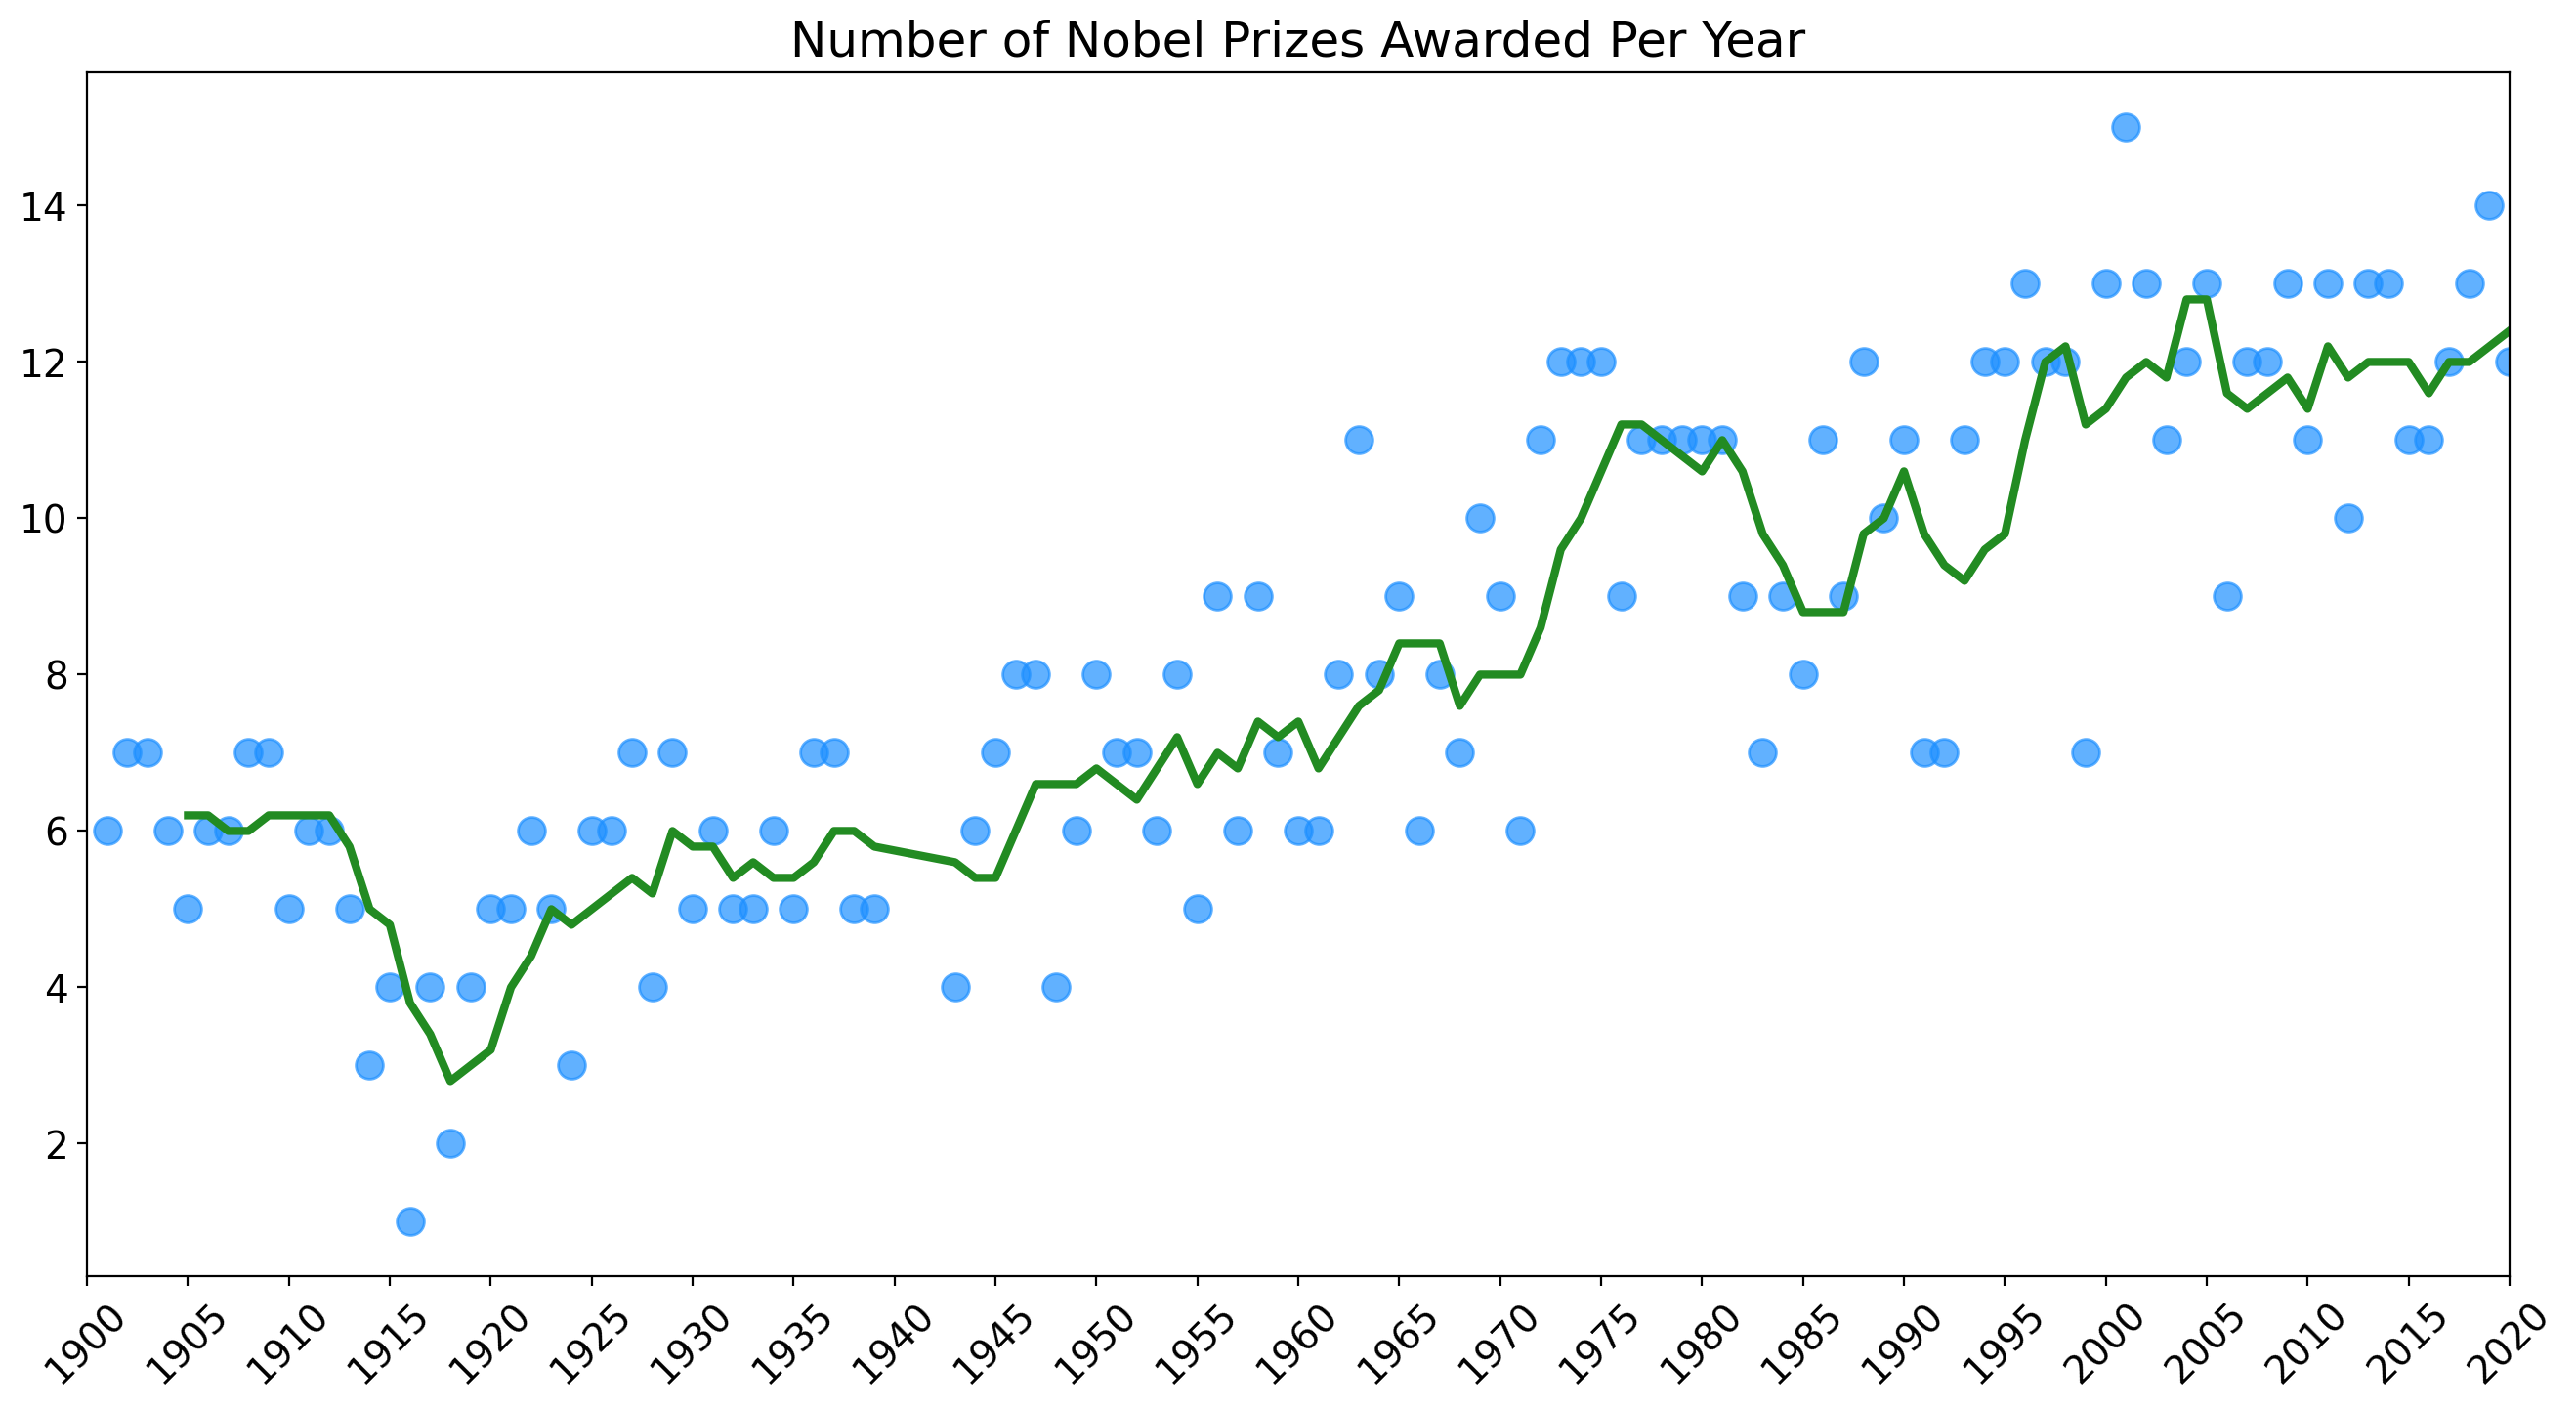

In [79]:
prize_per_year = df_data.groupby('year').count().prize
moving_average = prize_per_year.rolling(5).mean()

plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded Per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
          fontsize=14,
          rotation=45)

ax = plt.gca()
ax.set_xlim(1900, 2020)

plt.scatter(x=prize_per_year.index,
           y=prize_per_year.values,
           c='dodgerblue',
           alpha=0.7,
           s=100)

plt.plot(prize_per_year.index,
        moving_average.values,
        c='forestgreen',
        linewidth=3)

plt.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

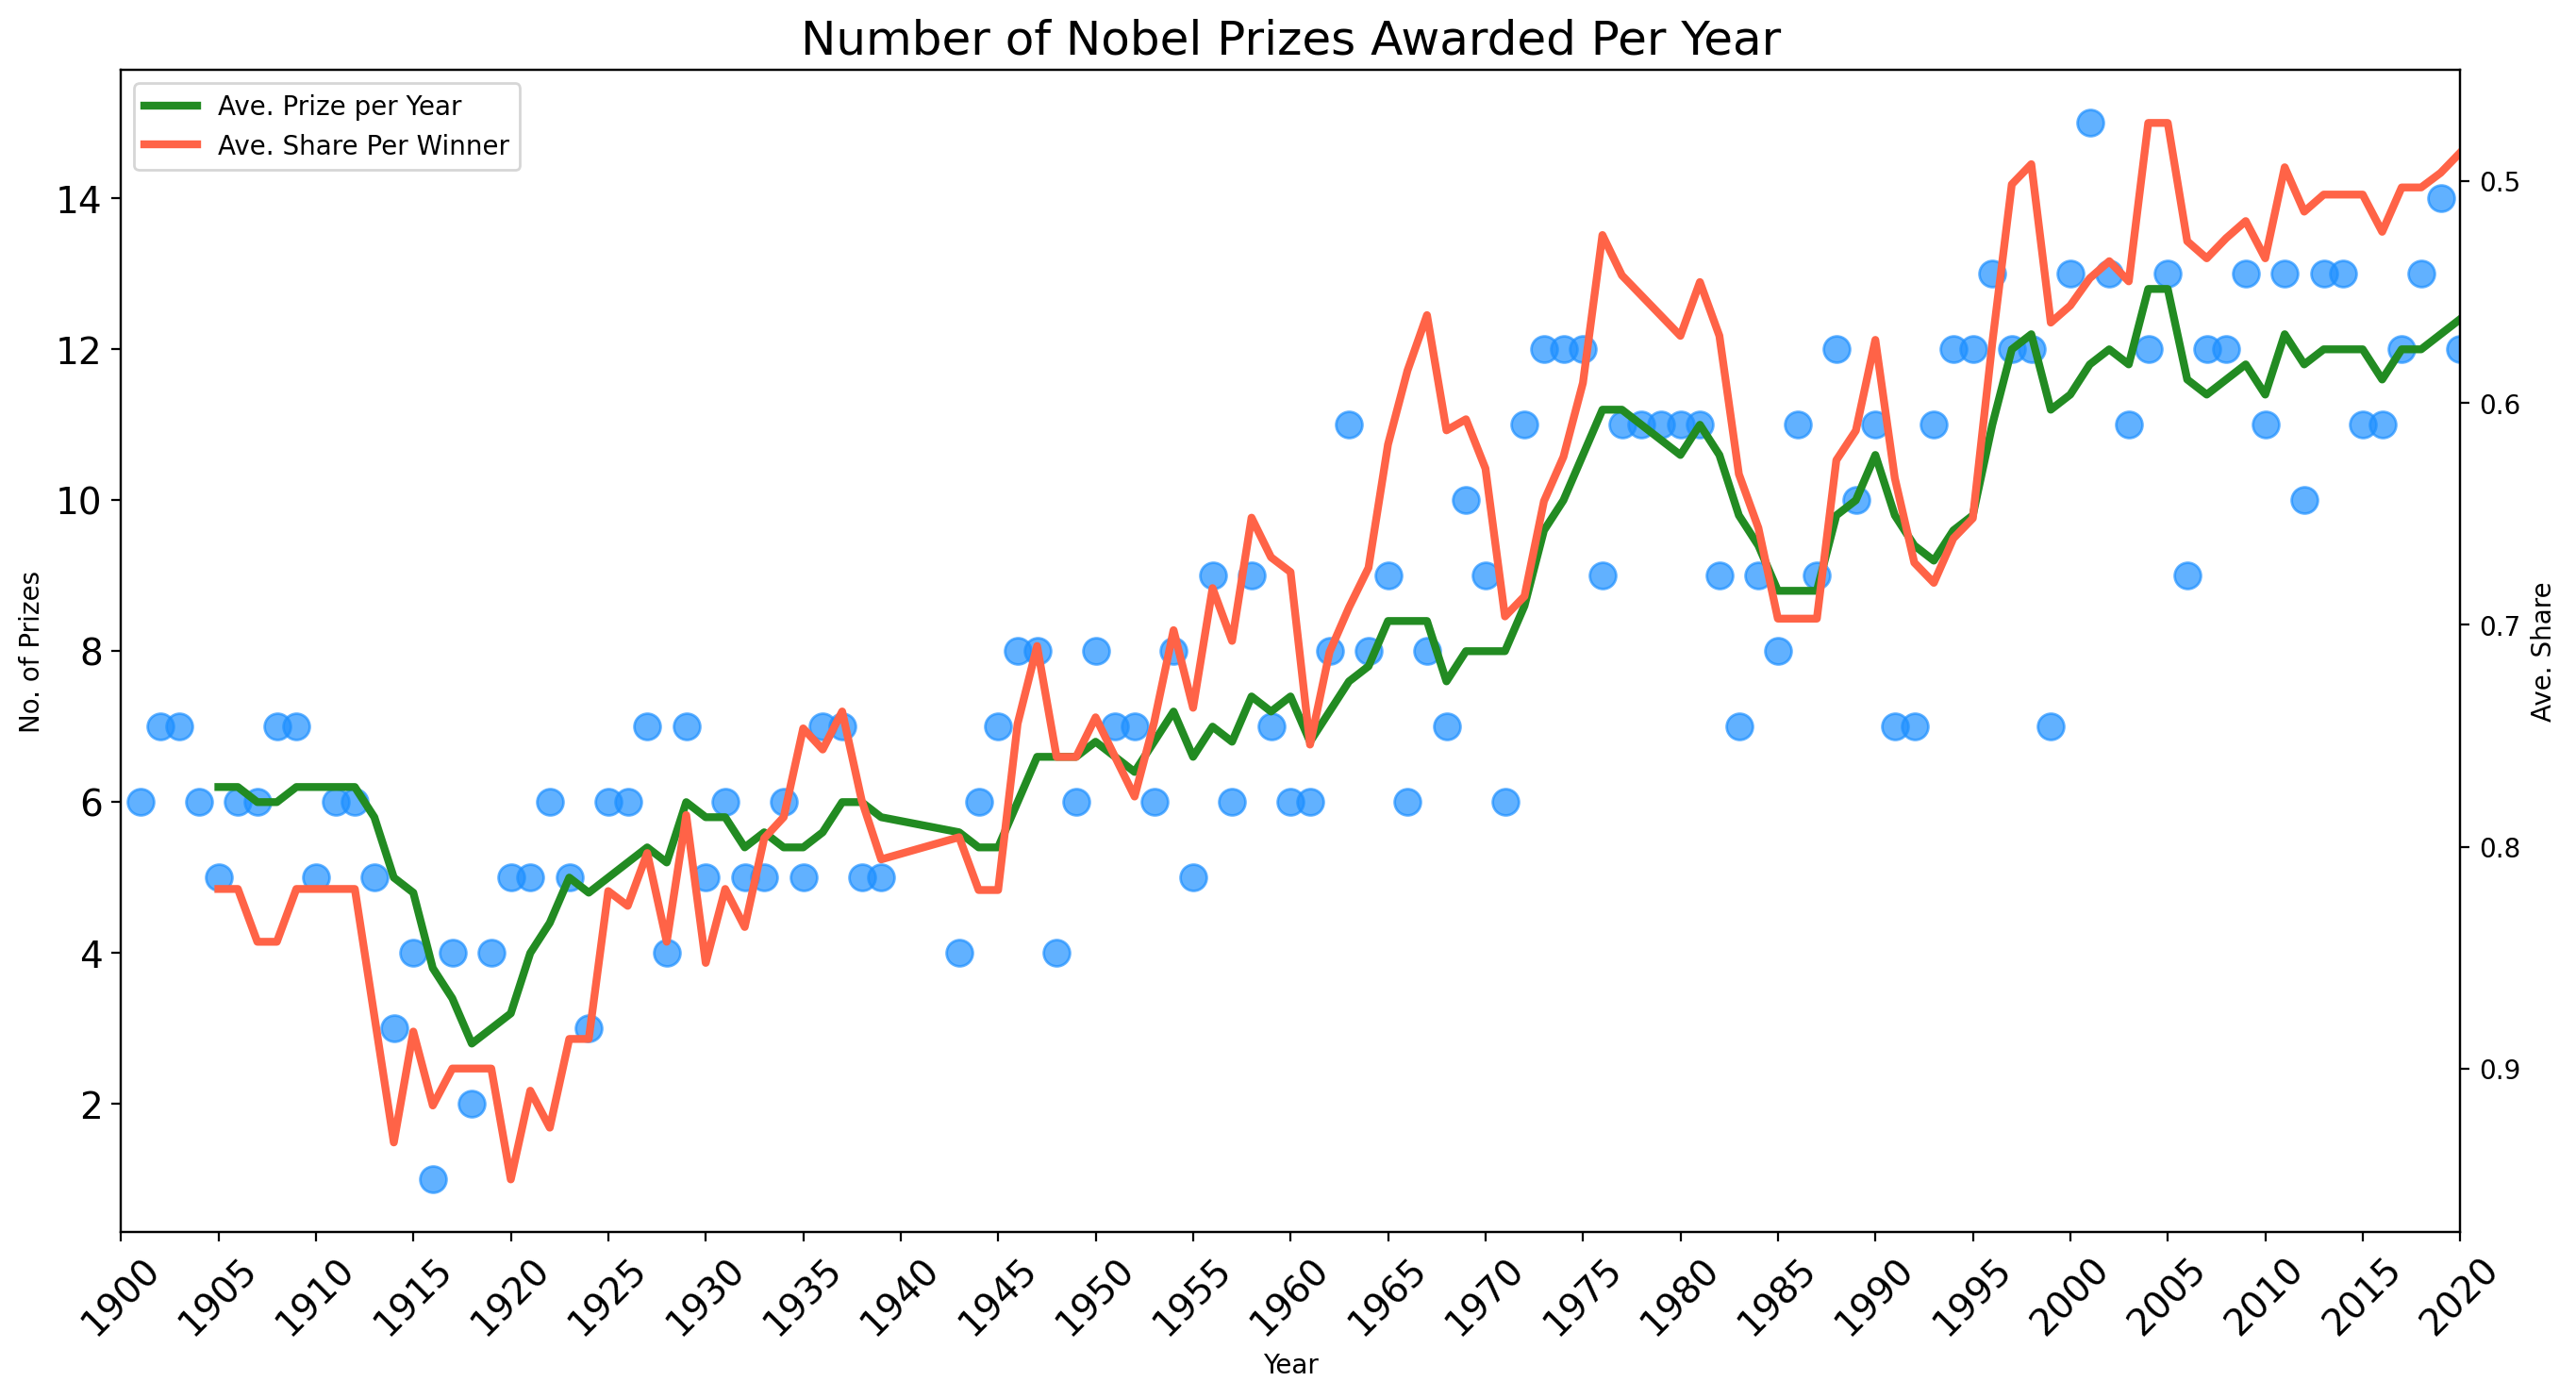

In [80]:
average_prize_share = df_data.groupby('year').mean().share_pct
share_moving_average = average_prize_share.rolling(5).mean()

plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded Per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
          fontsize=14,
          rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)


ax2.invert_yaxis()

ax1.scatter(x=prize_per_year.index,
           y=prize_per_year.values,
           c='dodgerblue',
           alpha=0.7,
           s=100)

l1 = ax1.plot(prize_per_year.index,
        moving_average.values,
        c='forestgreen',
        linewidth=3,
             label='Ave. Prize per Year')

l2 = ax2.plot(prize_per_year.index,
        share_moving_average.values,
        c='tomato',
        linewidth=3,
             label='Ave. Share Per Winner')

ax1.set_xlabel('Year')
ax1.set_ylabel('No. of Prizes')
ax2.set_ylabel('Ave. Share')

ax1.legend(handles=l1+l2)


plt.show()

What do we see on the chart? Well, there is clearly an upward trend in the number of prizes being given out as more and more prizes are shared. Also, more prizes are being awarded from 1969 onwards because of the addition of the economics category. We also see that very few prizes were awarded during the first world war (1914-1918) and second world war (1939-1949). Note that instead of there being a zero entry for those years, we instead see the effect of the wards as missing blue dots.

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [40]:
top_countries = df_data.groupby('birth_country_current', as_index=False).agg({'prize': 'count'})
top_countries.sort_values('prize', inplace=True,)
top20_countries = top_countries[-20:]
top20_countries

birth_country_current  prize
7                    Belgium      9
31                   Hungary      9
33                     India      9
2                  Australia     10
20                   Denmark     12
54                    Norway     12
13                     China     12
51               Netherlands     18
3                    Austria     18
39                     Italy     19
68               Switzerland     19
11                    Canada     20
61                    Russia     26
40                     Japan     27
57                    Poland     27
67                    Sweden     29
25                    France     57
26                   Germany     84
73            United Kingdom    105
74  United States of America    281

In [41]:
h_bar = px.bar(x=top20_countries.prize,
              y=top20_countries.birth_country_current,
              orientation='h',
              color=top20_countries.prize,
              color_continuous_scale='Viridis',
              title='Top 20 Countries by Number of Nobel Prizes',
              labels={'x': 'Prizes', 'y': 'Country'})

h_bar.update_layout(xaxis_title='No. of Prizes',
                   yaxis_title="Country",
                   coloraxis_showscale=False)

h_bar.show()

The United States has a massive number of prizes by this measure. The UK and Germany are in second and third place respectively.

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [42]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)

world_map = px.choropleth(df_countries,
                         locations='ISO',
                         color='prize',
                         hover_name='birth_country_current',
                         color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=False)

world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [45]:
cat_country = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)
cat_country

birth_country_current   category  prize
204  United States of America   Medicine     78
206  United States of America    Physics     70
201  United States of America  Chemistry     55
202  United States of America  Economics     49
198            United Kingdom   Medicine     28
..                        ...        ...    ...
97                       Iraq      Peace      1
99                    Ireland   Medicine      1
100                   Ireland    Physics      1
102                    Israel  Economics      1
210                  Zimbabwe      Peace      1

[211 rows x 3 columns]

In [50]:
merged_df = pd.merge(cat_country, top20_countries, on='birth_country_current')

#change column names
merged_df.columns = ['birth_country_current', 'category', 'category_prize', 'total_prize']
merged_df.sort_values(by='total_prize', inplace=True)
merged_df

birth_country_current   category  category_prize  total_prize
109                     India    Physics               1            9
108                     India      Peace               1            9
88                    Belgium      Peace               3            9
89                    Belgium   Medicine               3            9
90                    Belgium  Chemistry               1            9
..                        ...        ...             ...          ...
4    United States of America      Peace              19          281
3    United States of America  Economics              49          281
2    United States of America  Chemistry              55          281
1    United States of America    Physics              70          281
0    United States of America   Medicine              78          281

[110 rows x 4 columns]

In [57]:
cat_country_bar = px.bar(merged_df,
                        x='category_prize',
                        y='birth_country_current',
                        color='category',
                        orientation='h',
                        title='Top 20 Countries by No. of Nobel Prizes and Category',
                        hover_name='birth_country_current')

cat_country_bar.update_layout(xaxis_title='Prize',
                             yaxis_title='Country')

cat_country_bar.show()

1. In which category are Germany and Japan the weakest compared to the United States?
    - Japan and Germany are weakest in Economics compared to the US.
2. In which category does Germany have more prizes than the UK?
    - Germany has more prizes in Physics and Literature than Germany.
3. In which categories does France have more prizes than Germany?
    - France has more prizes in Peace, Literature, and Economics than Germany.
4. Which category makes up most of Australia's nobel prizes?
    - Medicine makes up most of Australia's nobel prizes.
5. Which category makes up half of the prizes in the Netherlands?
    - Physics makes up half of the prizes in the Netherlands.
6. Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?
    - Yes.

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [29]:
df_data[:1]

year   category                              prize  \
0  1901  Chemistry  The Nobel Prize in Chemistry 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00

In [61]:
prize_per_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_per_year = prize_per_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_per_year

year     birth_country_current  prize
118  1901                    France      2
346  1901                    Poland      1
159  1901                   Germany      1
312  1901               Netherlands      1
440  1901               Switzerland      1
..    ...                       ...    ...
31   2019                   Austria      1
221  2020                   Germany      1
622  2020  United States of America      7
533  2020            United Kingdom      2
158  2020                    France      1

[627 rows x 3 columns]

In [62]:
cumulative_prizes = prize_per_year.groupby(['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      2
2                   Argentina  1936      1
3                   Argentina  1947      2
4                   Argentina  1980      3
..                        ...   ...    ...
622  United States of America  2020    281
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

In [60]:
line_chart = px.line(cumulative_prizes,
                    x='year',
                    y='prize',
                    color='birth_country_current',
                    hover_name='birth_country_current',
                    title='Nobel Prizes by Country')

line_chart.update_layout(xaxis_title='Year',
                    yaxis_title='No. of Prizes')

line_chart.show()

What we see is that the United States really started to take off after the Second World War which decimated Europe. Prior to that, the Nobel prize was pretty much a European affair. Very few laureates were chosen from other parts of the world. This has changed dramatically in the last 40 years or so. There are many more countries represented today than in the early days. Interestingly we also see that the UK and Germany traded places in the 70s and 90s on the total number of prizes won. Sweden being 5th place pretty consistently over many decades is quite interesting too.

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [64]:
top20_orgs = df_data.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)
top20_orgs

Sorbonne University                              7
Harvard Medical School                           7
Institut Pasteur                                 7
London University                                7
Bell Laboratories                                8
Cornell University                               8
Yale University                                  9
MRC Laboratory of Molecular Biology             10
University of Oxford                            12
Rockefeller University                          13
Max-Planck-Institut                             13
Princeton University                            15
California Institute of Technology (Caltech)    17
Columbia University                             17
University of Cambridge                         18
University of Chicago                           20
Massachusetts Institute of Technology (MIT)     21
Stanford University                             23
Harvard University                              29
University of California       

In [66]:
h_bar = px.bar(x=top20_orgs.values,
              y=top20_orgs.index,
              orientation='h',
              title='No. of Nobel Prizes by Organization',
              color=top20_orgs.values,
               color_continuous_scale='turbo',
                labels={'x': 'Prizes', 'y': 'Org'}
              )

h_bar.update_layout(xaxis_title='No. of Prizes',
                   yaxis_title='Organization Name',
                   coloraxis_showscale=False)

h_bar.show()

University of Chicago won 20 Nobel prizes while Harvard University won 29 Nobel prizes.

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [68]:
top20_org_cities = df_data.groupby('organization_city', as_index=False).agg({'prize': pd.Series.count})
top20_org_cities.sort_values('prize', inplace=True)
top20_org_cities = top20_org_cities[-20:]
top20_org_cities[['organization_city', 'prize']]

organization_city  prize
65          Göttingen      8
186            Zurich      8
71         Heidelberg      9
119     New Haven, CT      9
110            Munich      9
23         Boston, MA      9
108            Moscow     10
157         Stockholm     10
126            Oxford     12
13             Berlin     12
129      Pasadena, CA     17
135     Princeton, NJ     19
39        Chicago, IL     20
12       Berkeley, CA     21
156      Stanford, CA     24
128             Paris     25
92             London     27
33          Cambridge     31
121      New York, NY     45
34      Cambridge, MA     50

In [69]:
h_bar = px.bar(top20_org_cities,
              x='prize',
              y='organization_city',
              orientation='h',
              color='prize',
               title='No. of Nobel Prizes by Organization City',
               color_continuous_scale='electric'
            )

h_bar.update_layout(xaxis_title='No. of Prizes',
                    yaxis_title='Organization City',
                   coloraxis_showscale=False)

h_bar.show()

The number one hotspot for discoveries in the world is Cambridge, MA. For Europe, London has the most discoveries.

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [71]:
top20_birth_cities = df_data.groupby('birth_city', as_index=False).agg({'prize': pd.Series.count})
top20_birth_cities.sort_values('prize', inplace=True)
top20_birth_cities = top20_birth_cities[-20:]
top20_birth_cities[['birth_city', 'prize']]

birth_city  prize
343          Milwaukee, WI      3
87                   Cairo      4
356               Montreal      4
428         Pittsburgh, PA      4
167  Frankfurt-on-the-Main      5
440                 Prague      5
515              Stockholm      6
210                Hamburg      6
363                 Munich      7
358                 Moscow      7
590         Washington, DC      8
64              Boston, MA      8
76            Brooklyn, NY      8
80                Budapest      8
48                  Berlin     11
112            Chicago, IL     12
572                 Vienna     14
313                 London     19
418                  Paris     26
382           New York, NY     53

In [72]:
h_bar = px.bar(top20_birth_cities,
              x='prize',
              y='birth_city',
              color='prize',
              orientation='h',
              color_continuous_scale=px.colors.sequential.Plasma,
              title='Birth Cities of Nobel Awardees')

h_bar.update_layout(xaxis_title='No. of Prizes',
                   yaxis_title='Birth City',
                   coloraxis_showscale=False)

h_bar.show()

A higher population definitely means that there's a higher chance of a Nobel laureate to be born there. New York, Paris, and London are all very populous. However, Vienna and Budapest are not and still produced many prize winners. That said, much of the ground-breaking research does not take place in big population centres, so the list of birth cities is quite different from the list above. Cambridge Massachusets, Stanford, Berkely and Cambridge (UK) are all the places where many discoveries are made, but they are not the birthplaces of laureates.

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [73]:
prizes_by_org = df_data.groupby(['organization_country', 'organization_city' , 'organization_name'], as_index=False).agg({'prize': pd.Series.count})
country_city_org = prizes_by_org.sort_values('prize', ascending=False)
country_city_org

organization_country     organization_city  \
205  United States of America         Cambridge, MA   
280  United States of America          Stanford, CA   
206  United States of America         Cambridge, MA   
209  United States of America           Chicago, IL   
195  United States of America          Berkeley, CA   
..                        ...                   ...   
110                     Japan               Sapporo   
111                     Japan                 Tokyo   
112                     Japan                 Tokyo   
113                     Japan                 Tokyo   
290  United States of America  Yorktown Heights, NY   

                               organization_name  prize  
205                           Harvard University     29  
280                          Stanford University     23  
206  Massachusetts Institute of Technology (MIT)     21  
209                        University of Chicago     20  
195                     University of California     19  
..                                           ...    ...  
110                          Hokkaido University      1  
111                      Asahi Kasei Corporation      1  
112                          Kitasato University      1  
113                Tokyo Institute of Technology      1  
290         IBM Thomas J. Watson Research Center      1  

[291 rows x 4 columns]

In [74]:
burst = px.sunburst(country_city_org,
                      path=['organization_country', 'organization_city', 'organization_name'],
                      values='prize',
                       title='Where Do Discoveries Take Place?',
                      )

burst.update_layout(xaxis_title='No. of Prizes',
                   yaxis_title='City',
                   coloraxis_showscale=False)

burst.show()

France is a great example of concentration. Practically all the organisations affiliated with Nobel prize winners are in Paris. In contrast, scientific discoveries are much more spread out across Germany. Meanwhile, the UK is dominated by Cambridge and London.

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When they Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [75]:
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'])
birth_years = df_data.birth_date.dt.year
df_data['winning_age'] = df_data.year - birth_years
df_data[:1]

year   category                              prize  \
0  1901  Chemistry  The Nobel Prize in Chemistry 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   

  organization_city organization_country  ISO  share_pct  winning_age  
0            Berlin              Germany  NLD       1.00        49.00

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [99]:
oldest_winners = df_data.loc[df_data['winning_age'] == df_data.winning_age.max()]
oldest_winners[['full_name', 'winning_age', 'prize']]

full_name  winning_age                              prize
937  John Goodenough        97.00  The Nobel Prize in Chemistry 2019

In [100]:
youngest_winners = df_data.loc[df_data['winning_age'] == df_data.winning_age.min()]
youngest_winners[['full_name', 'winning_age', 'prize']]

full_name  winning_age                       prize
885  Malala Yousafzai        17.00  The Nobel Peace Prize 2014

In [78]:
display(df_data.nlargest(n=1, columns='winning_age'))
display(df_data.nsmallest(n=1, columns='winning_age'))

year   category                              prize  \
937  2019  Chemistry  The Nobel Prize in Chemistry 2019   

                                         motivation prize_share laureate_type  \
937  “for the development of lithium-ion batteries”         1/3    Individual   

           full_name birth_date birth_city birth_country  \
937  John Goodenough 1922-07-25       Jena       Germany   

    birth_country_current   sex    organization_name organization_city  \
937               Germany  Male  University of Texas         Austin TX   

         organization_country  ISO  share_pct  winning_age  
937  United States of America  DEU       0.33        97.00

year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    laureate_type         full_name birth_date birth_city birth_country  \
885    Individual  Malala Yousafzai 1997-07-12    Mingora      Pakistan   

    birth_country_current     sex organization_name organization_city  \
885              Pakistan  Female               NaN               NaN   

    organization_country  ISO  share_pct  winning_age  
885                  NaN  PAK       0.50        17.00

John Goodenough was 97 years old when he got the Nobel prize!!! Holy moly. Interestingly John was born to American parents while they were in Germany. This is one example where our analysis of countries counts an extra "German" prize even though he is an American citizen. Too bad we don't have a nationality column in our dataset! Nonetheless, this goes to show it is never too late to win a Nobel prize.

In [102]:
print(f"The average age of a winner is {round(df_data.winning_age.mean(),2)} years old.")

The average age of a winner is 59.95 years old.


### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [103]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

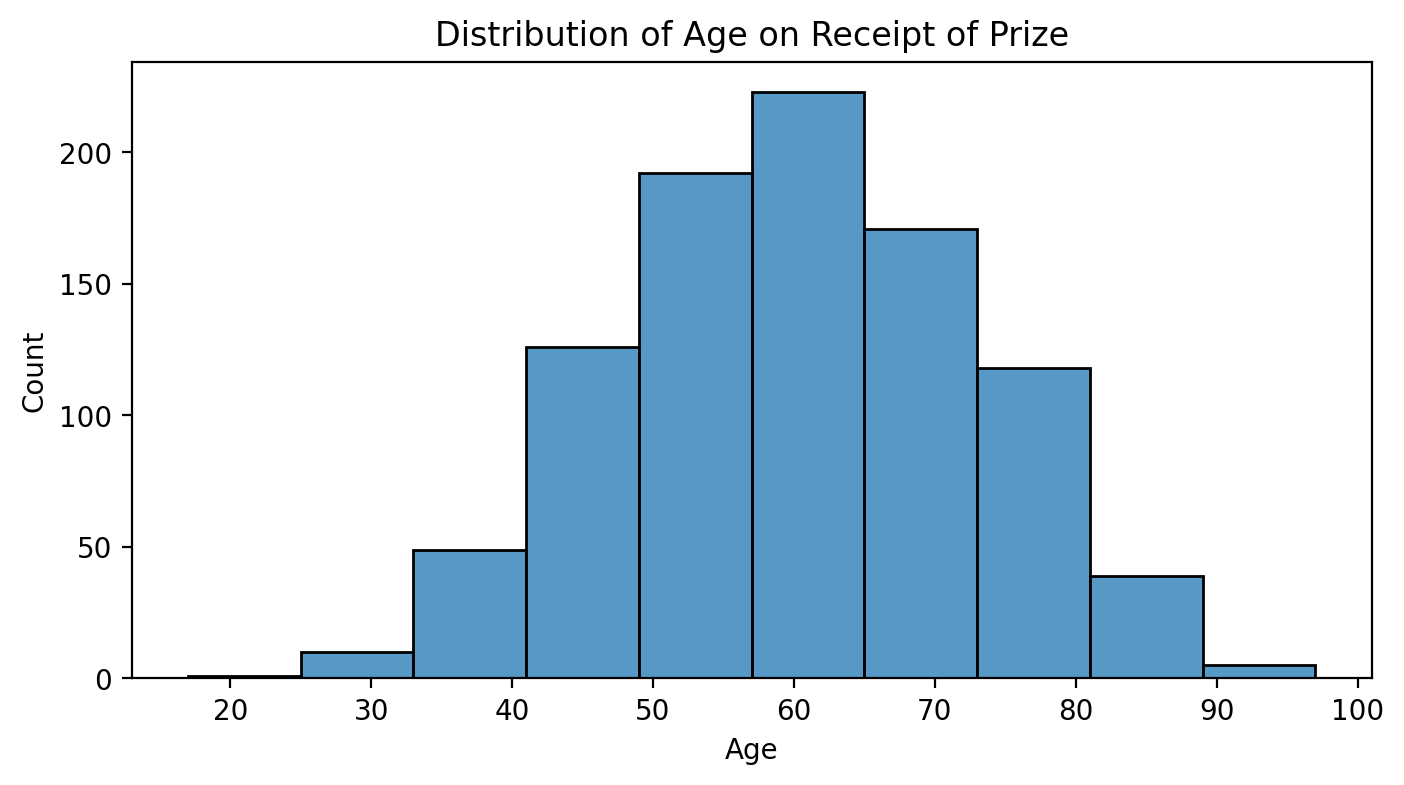

In [104]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(df_data,
                  x='winning_age',
                  bins=10)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

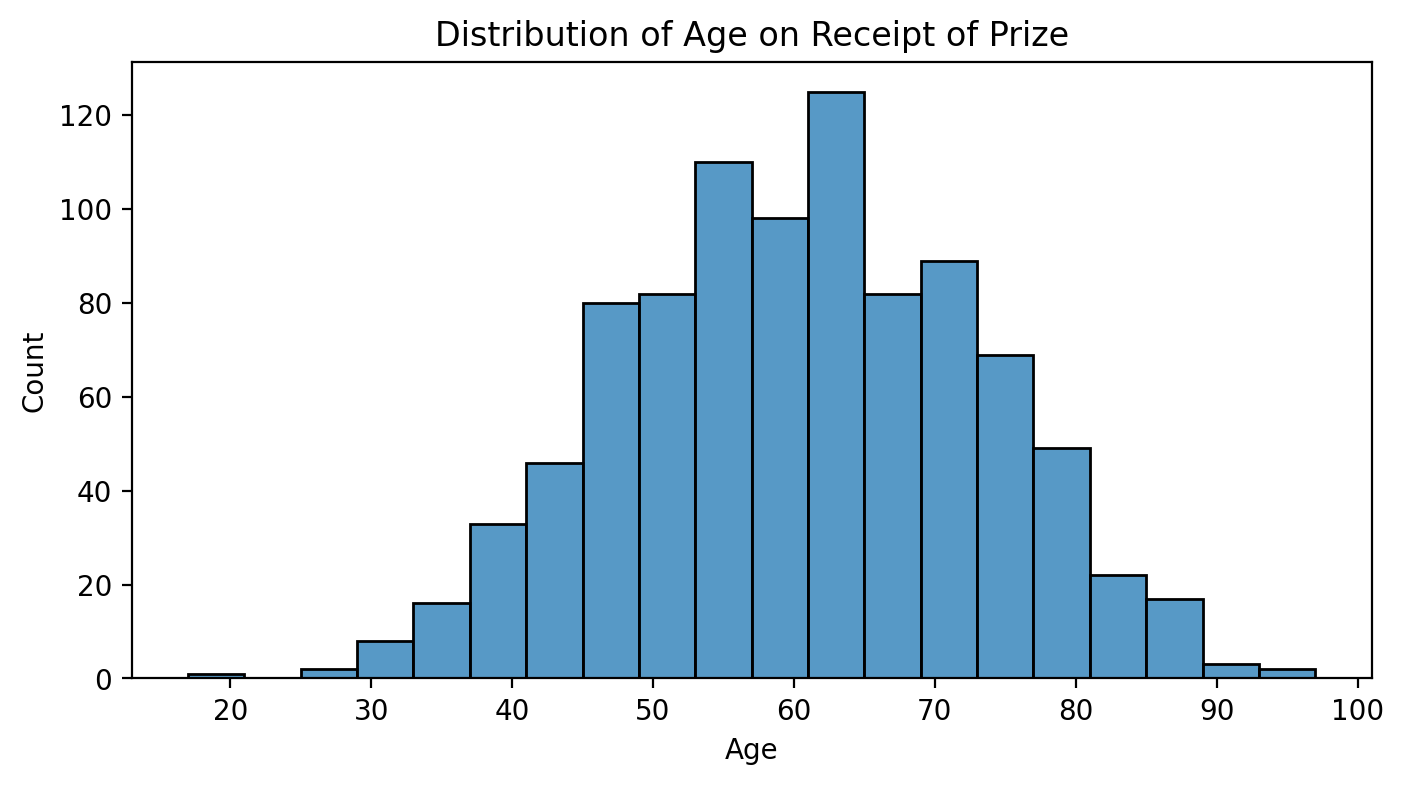

In [105]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(df_data,
                  x='winning_age',
                  bins=20)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

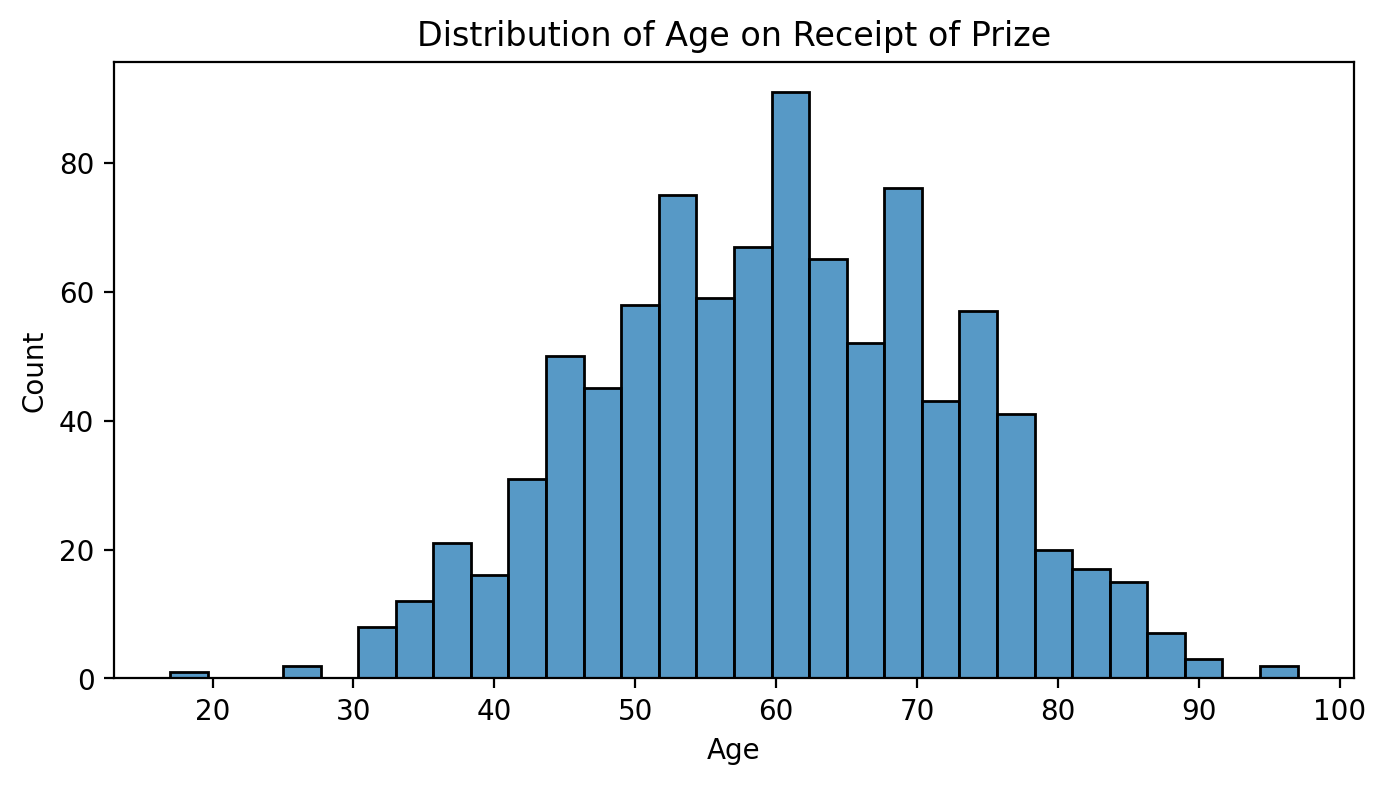

In [106]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(df_data,
                  x='winning_age',
                  bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

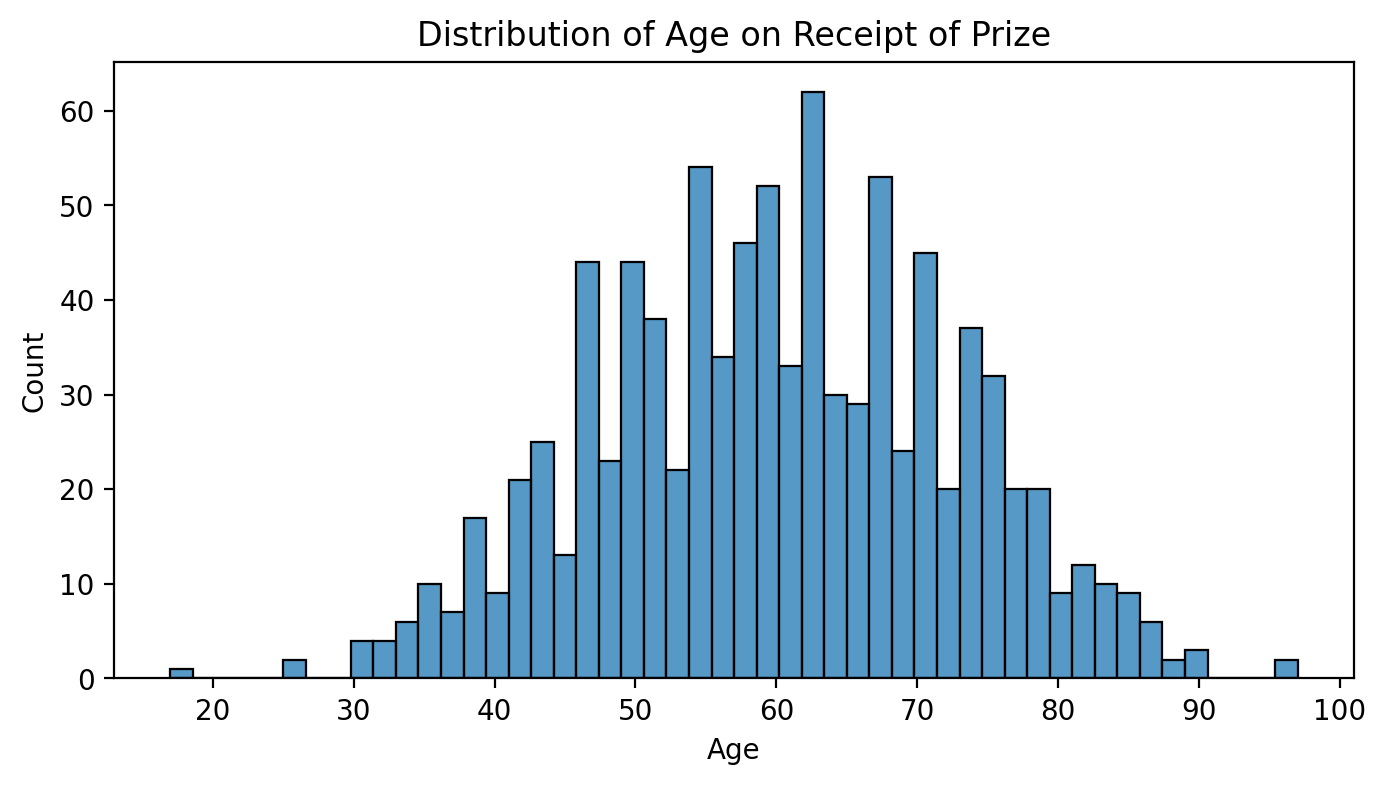

In [107]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(df_data,
                  x='winning_age',
                  bins=50)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


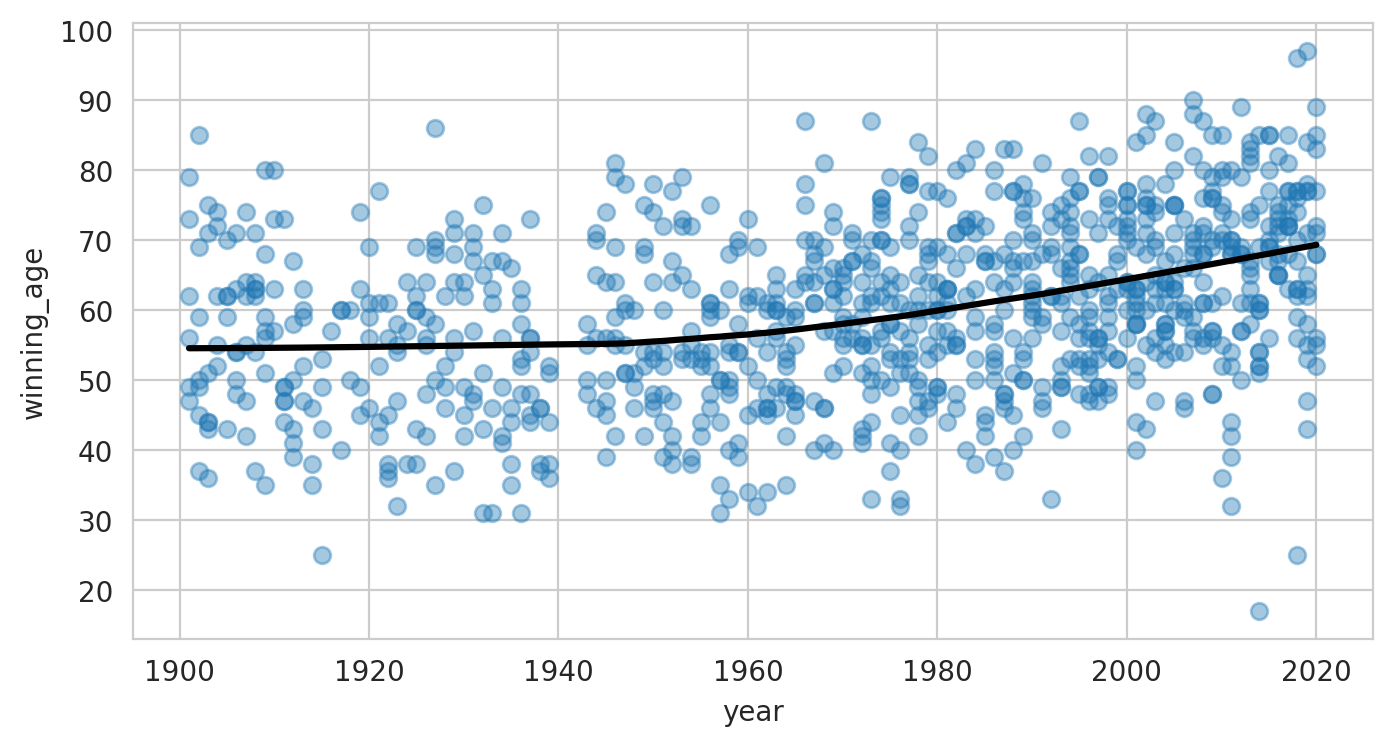

In [34]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('whitegrid'):
    sns.regplot(data=df_data,
               x='year',
               y='winning_age',
               lowess=True,
               scatter_kws={'alpha': 0.4},
               line_kws={'color': 'black'})
plt.show()

Using the lowess parameter allows us to plot a local linear regression. This means the best fit line is still linear, but it's more like a moving average which gives us a non-linear shape across the entire series. This is super neat because it clearly shows how the Nobel laureates are getting their award later and later in life. From 1900 to around 1950, the laureates were around 55 years old, but these days they are closer to 70 years old when they get their award! The other thing that we see in the chart is that in the last 10 years the spread has increased. We've had more very young and very old winners. In 1950s/60s winners were between 30 and 80 years old. Lately, that range has widened.

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

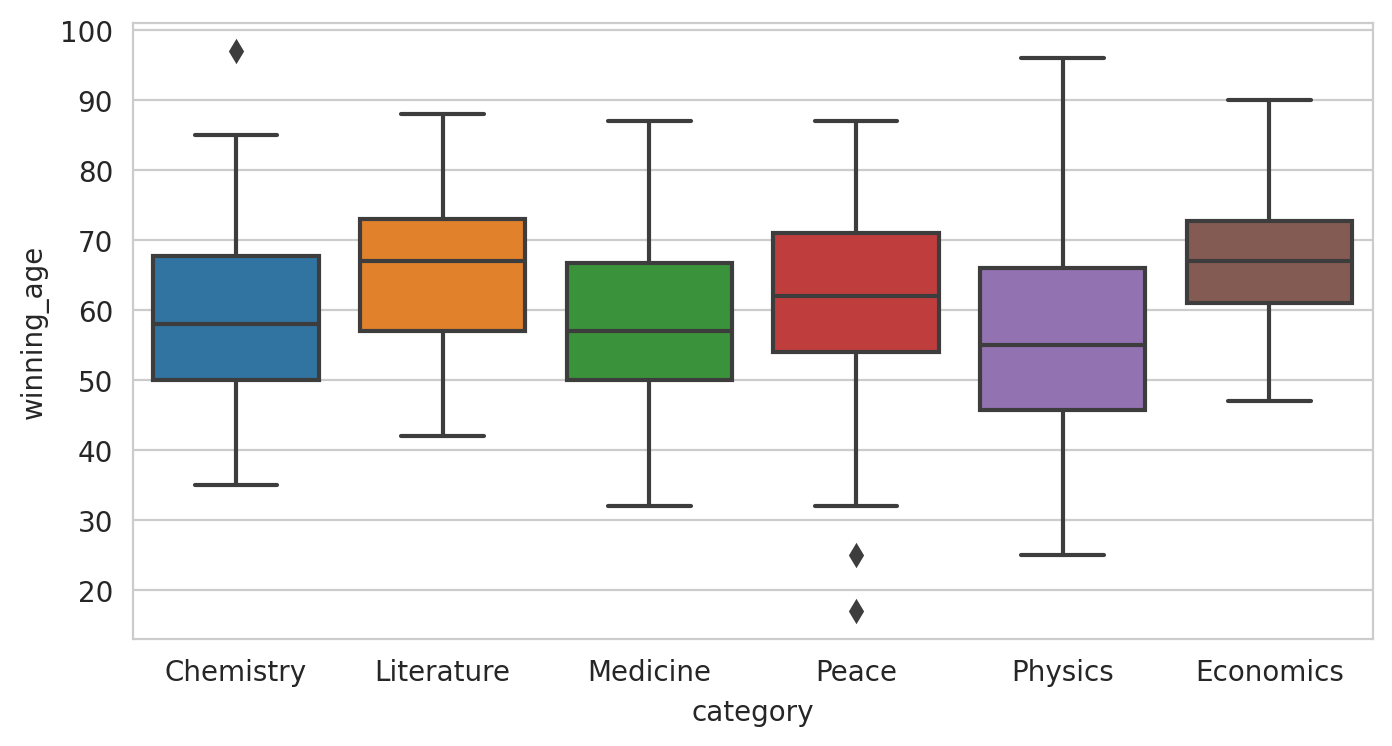

In [38]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(df_data,
                x='category',
                y='winning_age')
plt.show()

The box plot shows us the mean, the quartiles, the maximum and the minimum values. It raises an interesting question: "Are peace prize winners really older than physics laureates?".

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


<Figure size 1600x800 with 0 Axes>

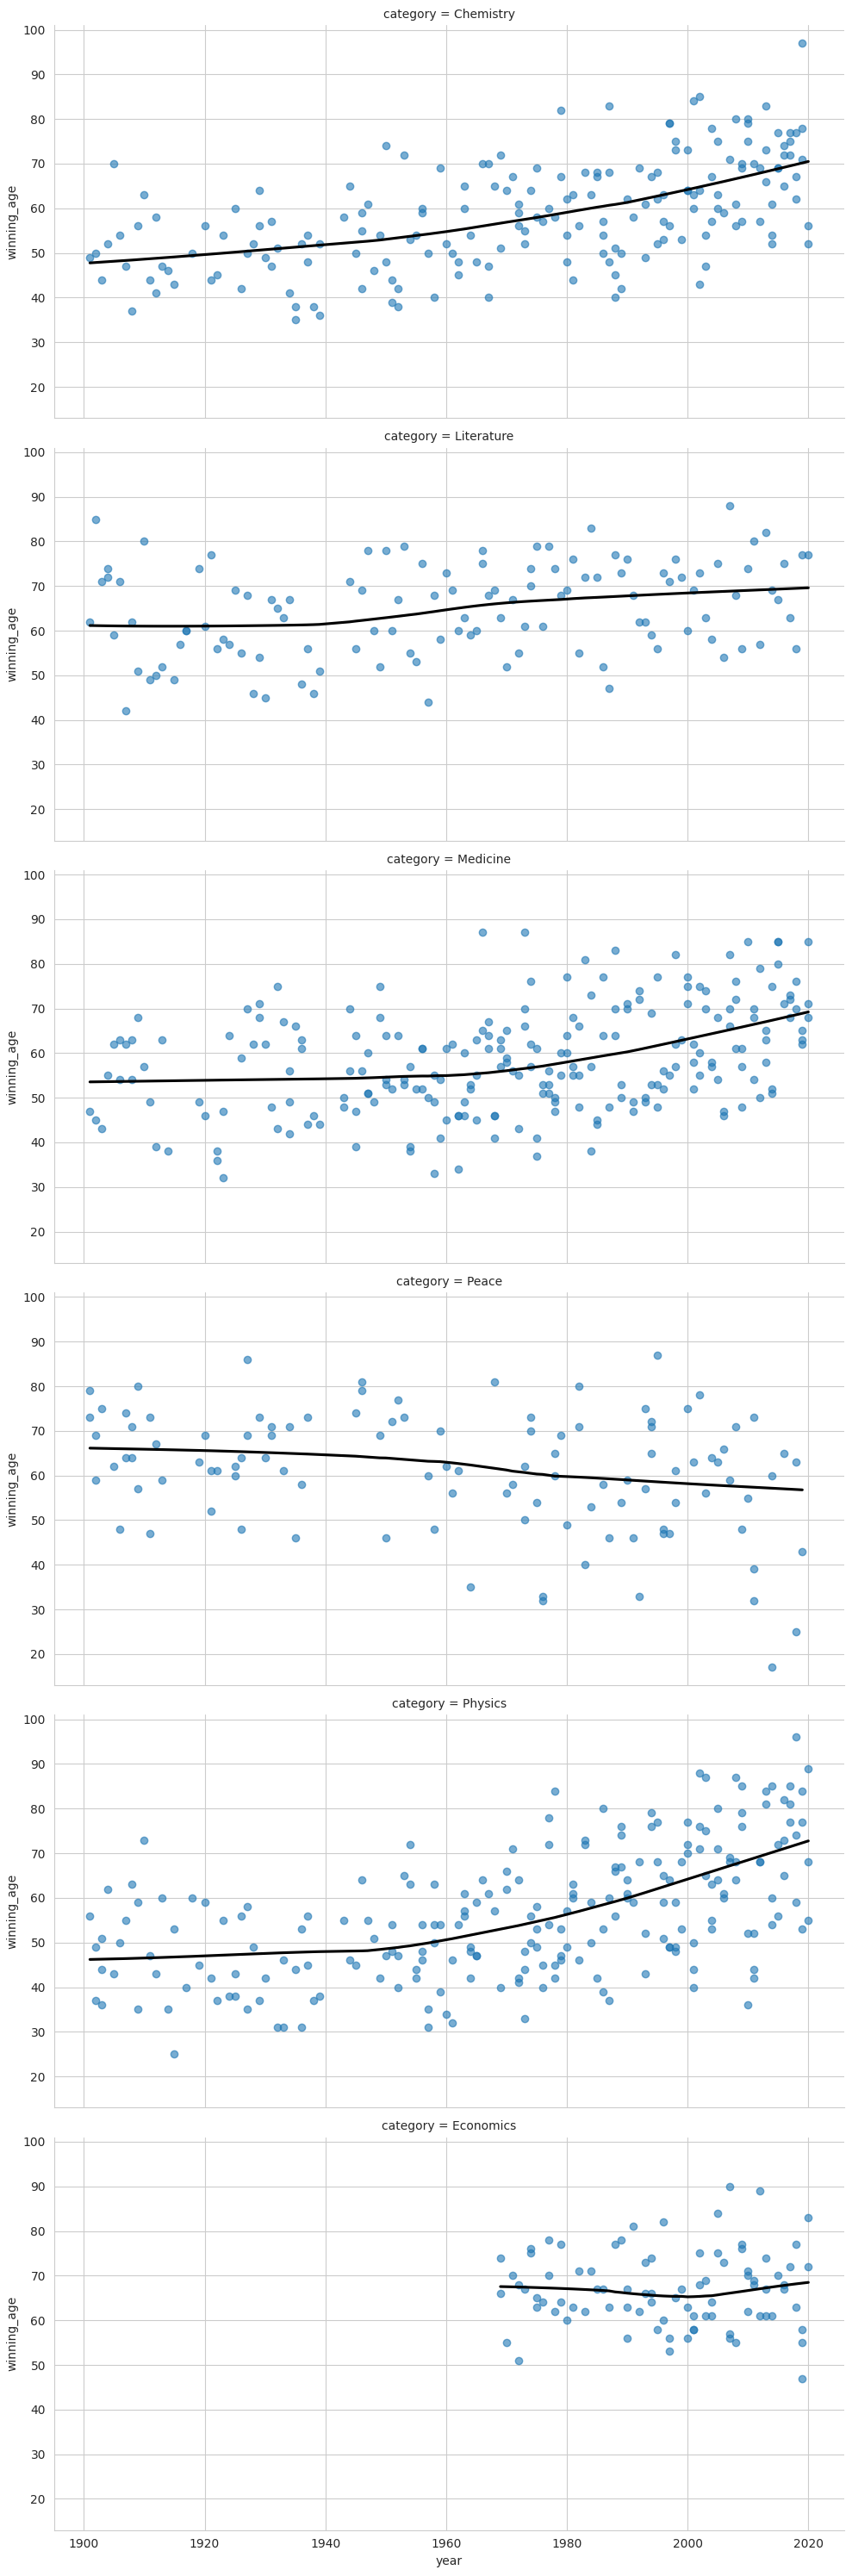

In [40]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.lmplot(df_data,
              x='year',
              y='winning_age',
              row='category',
               lowess=True,
              aspect=2,
              scatter_kws={'alpha': 0.6},
              line_kws={'color': 'black'})
plt.show()

We see that winners in physics, chemistry, and medicine have gotten older over time. The ageing trend is strongest for physics. The average age used to be below 50, but now it's over 70. Economics, the newest category, is much more stable in comparison. The peace prize shows the opposite trend where winners are getting younger! As such, our scatter plots showing the best fit lines over time and our box plot of the entire dataset can tell very different stories!

<Figure size 1600x800 with 0 Axes>

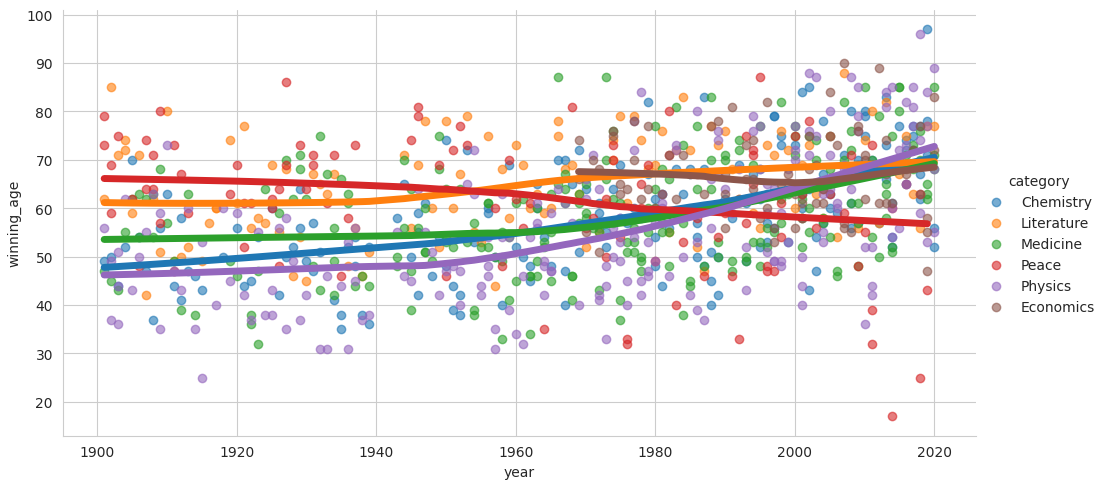

In [80]:
#to combine all charts, use the hue parameter

plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.lmplot(df_data,
              x='year',
              y='winning_age',
               hue='category',
               lowess=True,
              aspect=2,
              scatter_kws={'alpha': 0.6},
              line_kws={'linewidth': 5})
plt.show()